In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# **Let's use Raw Python with Numpy and Math to Solve a common Classification problem with the MNIST DataSet a.k.a "The Hello World! of Machine Learning".**

> The MNIST DataSet is an already Pre-Processed DataSet that contains handwritten digits (from 1 to 10) as 28x28 Pixels Matrices, where each pixel represent the density of the color Black, from 0 - Completely Dark to 255 - Completely White.
> We'll teach the Machine, through Supervised Learning, how to correctly classify the handwritten digits, or in other terms, to understand which number it's in front of, based on the color (Black) density of each of the 784 Pixels.

# PLEASE NOTE:
**The Neural Network we are going to build is Hard-Coded, which means that this code is not Flexible enough to handle Different NN Architectures without rewriting many parts of the Code.**

* **Importing the Required Libraries.**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

* **Importing the DataSet.**

In [16]:
Data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [17]:
Data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* **Some Initial Data Wrangling.**

In [18]:
#Turning the Data into a Numpy Array.
TrainData = np.array(Data)

#Saving the Training Data Shape into Variables.
TrainingDataRows, TrainingDataColumns = TrainData.shape

#Shuffling the Data.
np.random.shuffle(TrainData)

#Creating the Validation DataSet.
ValidationSize = 1000
ValidationData = TrainData[0:ValidationSize].T #Transposing it

#Creating the Training DataSet.
TrainData = TrainData[ValidationSize:].T #Transposing it

#Splitting the Validation DataSet.
ValX = ValidationData[1:] #Every Column except the First one, which is the Label Column.
ValX = ValX/255. #Standardizing
ValY = ValidationData[0] #Since 0 is the Index of the Label Column.

#Splitting the Training DataSet.
TrainX = TrainData[1:] #Every Column except the First one, which is the Label Column.
TrainX = TrainX/255. #Standardizing
TrainY = TrainData[0] #Since 0 is the Index of the Label Column.

* **Defining the ANN Architecture.**

In [19]:
InputSize = 784 #One Input Neuron for each Pixel.
OutputSize = 10 #Ten, since they are our Number of Different Ouputs (Numbers from 1 to 10).
HiddenLayersSize = 50 #Size of the Hidden Layers, we will have 2 and assume they'll have same Size.

* **Defining a Function for Initializing Weights and Biases.**

In [20]:
def InitParams():
    InitRange = 0.1
    
    #Try to Draw down the Neural Network Architecture to better Understand Weights and Biases Shapes.
    WeightsLayerOne = np.random.uniform(-InitRange, InitRange, size = (HiddenLayersSize, InputSize))
    BiasesLayerOne = np.random.uniform(-InitRange, InitRange, size = (HiddenLayersSize, 1))
    WeightsLayerTwo = np.random.uniform(-InitRange, InitRange, size = (HiddenLayersSize, HiddenLayersSize))
    BiasesLayerTwo = np.random.uniform(-InitRange, InitRange, size = (HiddenLayersSize, 1))
    WeightsOutputLayer = np.random.uniform(-InitRange, InitRange, size = (OutputSize, HiddenLayersSize))
    BiasesOutputLayer = np.random.uniform(-InitRange, InitRange, size = (OutputSize, 1))
    
    return WeightsLayerOne, BiasesLayerOne, WeightsLayerTwo, BiasesLayerTwo, WeightsOutputLayer, BiasesOutputLayer

### The Formulas that We'll use for Forward Propagation are:

$Z[1] = W[1]X+B[1]$
 
$A[1] = ReLU(Z[1])$
 
$Z[2] = W[2]A[1]+B[2]$

$A[2] = ReLU(Z[2])$

$Z[3] = W[3]A[2]+B[3]$
 
$A[3] = SoftMax(Z[3])$ 

**Explanation:**

1. We Calculate the Dot Product and add the Biases B1 of the Input Layer and the Weights W1.
2. We'll Obtain the (Linear) Output Variable of the First Hidden Layer, which we will call Z1.
3. We'll Add Non-Linearity to the Z1 Output, Obtaining A1, the Output of the First Hidden Layer.
4. We'll move onto the Second Hidden Layer, where we'll Calculate the Dot Product and add the Biases B2 of the Output A1 and Weights W2.
5. We'll Obtain the Output Variable of the Second Hidden Layer, which we will call Z2.
6. We'll Add Non-Linearity to the Z2 Output, Obtaining A2, the Output of the Second Hidden Layer.
7. We'll move onto the Output Layer, where we'll Calculate the Dot Product and add the Biases B3 of the Output A2 and Weights W3, Obtaining Z3.
8. We'll use the SoftMax Function to the Z3 Output and Obtain the Final Predicted Output, which we'll call A3.

### The Formulas that We'll use for Backward Propagation are:

$dZ^{[3]} = A^{[3]} - Y$

$dW^{[3]} = \frac{1}{m} dZ^{[3]} A^{[2]T}$

$dB^{[3]} = \frac{1}{m} \Sigma {dZ^{[3]}}$

$dZ^{[2]} = W^{[3]T} dZ^{[3]} .* g^{[2]\prime} (z^{[2]})$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$

### The Formulas that We'll use for Weights Updates are:

$W^{[3]} := W^{[3]} - \alpha dW^{[3]}$

$B^{[3]} := B^{[3]} - \alpha dB^{[3]}$

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$B^{[2]} := B^{[2]} - \alpha dB^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$B^{[1]} := B^{[1]} - \alpha dB^{[1]}$

* **Defining the Functions for Making the ANN Run.**

In [21]:
def ReLu(x):
    return np.maximum(0, x) #This is Literally the ReLu Function.

def SoftMax(x):
    return np.exp(x) / sum(np.exp(x)) #This is Literally the SoftMax Function.

def ForwardPropagation(w1, b1, w2, b2, w3, b3, x):
    #Calculating the Output of the First Layer 
    z1 = w1.dot(x) + b1
    a1 = ReLu(z1)
    z2 = w2.dot(a1) + b2
    a2 = ReLu(z2)
    z3 = w3.dot(a2) + b3
    a3 = SoftMax(z3)
    
    return z1, a1, z2, a2, z3, a3

def OneHotEncoding(y):
    Y = np.zeros((y.size, y.max()+1))
    Y[np.arange(y.size), y] = 1
    Y  = Y.T
    
    return Y

def ReLuDerivative(z):
    return z > 0 #The ReLu Derivative literally returns False (0) if z <= 0 otherwise returns True (1)

def BackPropagation(z1, a1, z2, a2, z3, a3, w1, w2, w3, x, y):
    m = y.size
    Y = OneHotEncoding(y)
    dz3 = a3 - Y
    dw3 = 1/m * dz3.dot(a2.T)
    db3 = 1/m * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * ReLuDerivative(z2)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * ReLuDerivative(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)
    
    return dw1, db1, dw2, db2, dw3, db3

def UpdateParameters(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    w3 = w3 - alpha*dw3
    b3 = b3 - alpha*db3
    
    return w1, b1, w2, b2, w3, b3

def GetPredictions(a3):
    return np.argmax(a3, 0)

def GetAccuracy(Preds, y):
    return np.sum(Preds == y) / y.size

def GradientDescent(x, y, Iterations, alpha):
    w1, b1, w2, b2, w3, b3 = InitParams()
    
    for i in range(Iterations):
        z1, a1, z2, a2, z3, a3 = ForwardPropagation(w1, b1, w2, b2, w3, b3, x)
        dw1, db1, dw2, db2, dw3, db3 = BackPropagation(z1, a1, z2, a2, z3, a3, w1, w2, w3, x, y)
        w1, b1, w2, b2, w3, b3 = UpdateParameters(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        
        if i%10 == 0:
            print(f"Iteration: {i}\nAccuracy: {GetAccuracy(GetPredictions(a3), y)}")
        
    return w1, b1, w2, b2, w3, b3

In [22]:
W1, B1, W2, B2, W3, B3 = GradientDescent(TrainX, TrainY, 500, 0.1)

Iteration: 0
Accuracy: 0.06602439024390244
Iteration: 10
Accuracy: 0.13065853658536586
Iteration: 20
Accuracy: 0.22626829268292684
Iteration: 30
Accuracy: 0.2940243902439024
Iteration: 40
Accuracy: 0.35848780487804877
Iteration: 50
Accuracy: 0.4166829268292683
Iteration: 60
Accuracy: 0.4841463414634146
Iteration: 70
Accuracy: 0.5768292682926829
Iteration: 80
Accuracy: 0.6527804878048781
Iteration: 90
Accuracy: 0.7091219512195122
Iteration: 100
Accuracy: 0.7494146341463415
Iteration: 110
Accuracy: 0.7786341463414634
Iteration: 120
Accuracy: 0.8007560975609757
Iteration: 130
Accuracy: 0.8169512195121951
Iteration: 140
Accuracy: 0.8308780487804878
Iteration: 150
Accuracy: 0.8418536585365853
Iteration: 160
Accuracy: 0.8514634146341463
Iteration: 170
Accuracy: 0.8576829268292683
Iteration: 180
Accuracy: 0.8636585365853658
Iteration: 190
Accuracy: 0.8686585365853658
Iteration: 200
Accuracy: 0.8734390243902439
Iteration: 210
Accuracy: 0.8768780487804878
Iteration: 220
Accuracy: 0.879731707317

**Around 90% Accuracy, not Bad!**

* **Let's Define some other Functions to see some of the Results:**

In [23]:
def MakePredictions(w1, b1, w2, b2, w3, b3, x):
    z1, a1, z2, a2, z3, a3 = ForwardPropagation(w1, b1, w2, b2, w3, b3, x)
    return GetPredictions(a3)

def TestPredictions(target, w1, b1, w2, b2, w3, b3):
    CurrentPic = TrainX[:, target, None]
    Preds = MakePredictions(w1, b1, w2, b2, w3, b3, TrainX[:, target, None])
    Label = TrainY[target]
    print("Prediction: ", Preds)
    print("Label: ", Label)
    
    CurrentPic = CurrentPic.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(CurrentPic, interpolation = 'nearest')
    plt.show()

Prediction:  [8]
Label:  8


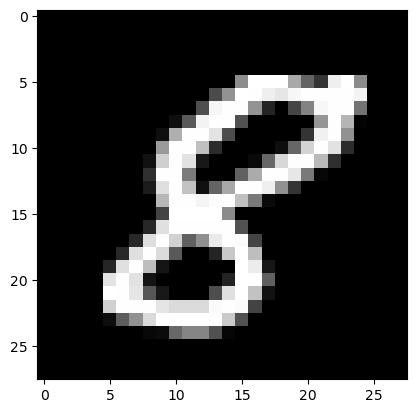

Prediction:  [1]
Label:  1


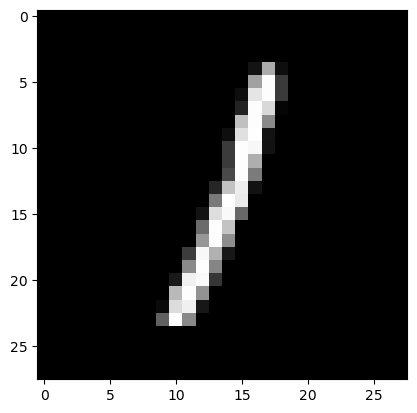

Prediction:  [1]
Label:  1


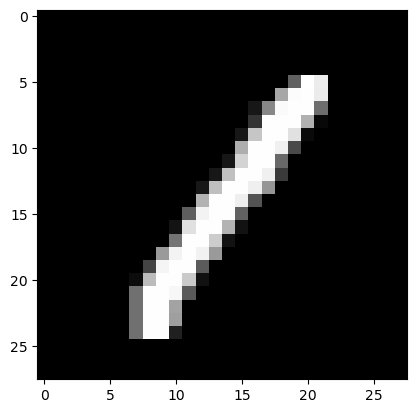

Prediction:  [5]
Label:  5


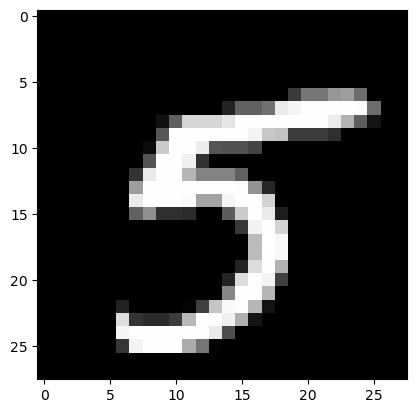

In [25]:
TestPredictions(0, W1, B1, W2, B2, W3, B3)
TestPredictions(1, W1, B1, W2, B2, W3, B3)
TestPredictions(2, W1, B1, W2, B2, W3, B3)
TestPredictions(3, W1, B1, W2, B2, W3, B3)

In [27]:
#Validation Accuracy
dev_predictions = MakePredictions(W1, B1, W2, B2, W3, B3, ValX)
GetAccuracy(dev_predictions, ValY)

0.912

In [45]:
Diff = MakePredictions(W1, B1, W2, B2, W3, B3, ValX) - ValY

np.count_nonzero(Diff) #88 Predictions Were Wrong.

88